In [134]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import json
%matplotlib inline 

In [135]:
path = "../experimental_data/lending_default-basic_tiny-mc_Pa_quantitative_monitor_100000000_1_1685128047/all_data.json"

In [132]:
df = pd.read_csv("../experimental_data/lending_default-lending_PaS1_quantitative_monitor_1000000_1_1683908975/verdict_data.csv", index_col=0)

In [137]:
with open(path, "r") as f:
    js = json.load(f)

In [139]:
for j in js[:10]:
    print(j)

{'verdicts': {'PaS1': {'verdict_lower': 0, 'verdict_upper': 1, 'point_estimate': 0, 'true_value': 0.0}}, 'repetition': 0, 'state': 167, 'observation': 'n', 'execution_time': 3.300001844763756e-05, 'time': 0}
{'verdicts': {'PaS1': {'verdict_lower': 0, 'verdict_upper': 1, 'point_estimate': 0, 'true_value': 0.0}}, 'repetition': 0, 'state': 8, 'observation': '*', 'execution_time': 7.08398874849081e-06, 'time': 1}
{'verdicts': {'PaS1': {'verdict_lower': 0, 'verdict_upper': 1, 'point_estimate': 0, 'true_value': 0.0}}, 'repetition': 0, 'state': 157, 'observation': 'a', 'execution_time': 6.707967258989811e-06, 'time': 2}
{'verdicts': {'PaS1': {'verdict_lower': 0, 'verdict_upper': 1, 'point_estimate': 0, 'true_value': 0.0}}, 'repetition': 0, 'state': 158, 'observation': '1', 'execution_time': 3.2624928280711174e-05, 'time': 3}
{'verdicts': {'PaS1': {'verdict_lower': 0, 'verdict_upper': 1, 'point_estimate': 0, 'true_value': 0.0}}, 'repetition': 0, 'state': 159, 'observation': 'r', 'execution_tim

In [4]:
data = []
for g in df[(df["expression"]=="Pa")].groupby("time"):
    empiric_lower, empiric_upper = g[1][g[1]["value_type"]=="point_estimate"]["value"].quantile([0.025,0.975]).values
    average_lower = g[1][g[1]["value_type"]=="verdict_lower"]["value"].mean()
    average_upper = g[1][g[1]["value_type"]=="verdict_upper"]["value"].mean()
    # print(g[1][g[1]["value_type"]=="verdict_lower"]["value"], g[1][g[1]["value_type"]=="verdict_upper"]["value"])
    data.append([g[0], "empiric_lower", empiric_lower])
    data.append([g[0], "empiric_upper", empiric_upper])
    data.append([g[0], "average_lower", average_lower])
    data.append([g[0], "average_upper", average_upper])
    
    

In [5]:
df3 = pd.DataFrame(data, columns=["time", "value_type", "value"])

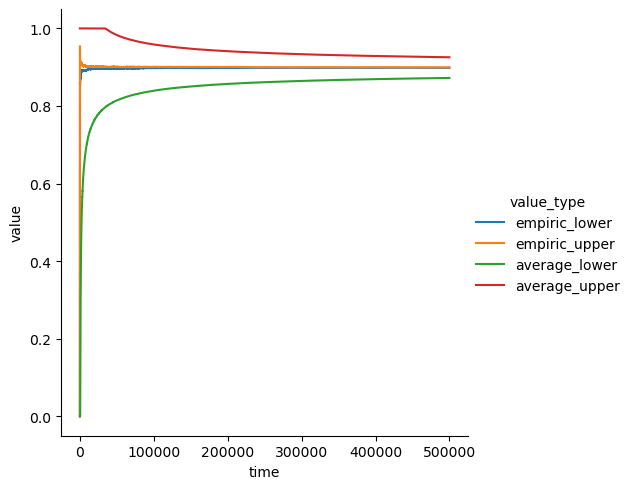

In [6]:
sns.relplot(kind="line", data=df3, x="time", y="value", hue="value_type")


In [7]:
df2 = df[(df["expression"]=="Pa") & (df["value_type"]=="point_estimate")].groupby("time")["value"].quantile([0.025,0.975])


In [21]:
df2 = df.groupby(["time", "expression", "value_type"]).mean().reset_index()[["time", "expression", "value_type", "value"]]

In [29]:
df3 = df.groupby(["time", "expression", "value_type"]).quantile([0.025,0.975]).reset_index().rename(columns={"level_3":"quantile"})[["time", "expression", "value_type","quantile", "value"]]

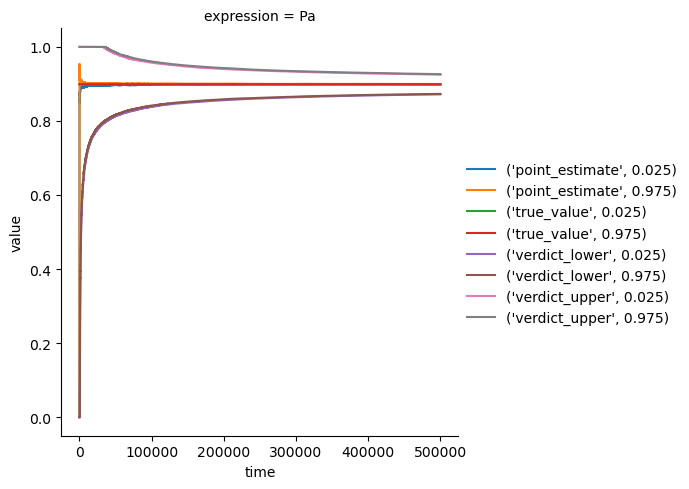

In [36]:
sns.relplot(kind="line", data=df3, x="time", y="value",  col="expression", hue=df3[["value_type","quantile"]].apply(tuple, axis=1))

In [32]:
df3

,time,expression,value_type,quantile,value
0,0,Pa,point_estimate,0.025,0.000000
1,0,Pa,point_estimate,0.975,0.000000
2,0,Pa,true_value,0.025,0.898876
3,0,Pa,true_value,0.975,0.898876
4,0,Pa,verdict_lower,0.025,0.000000
...,...,...,...,...,...
4000003,500000,Pa,true_value,0.975,0.898876
4000004,500000,Pa,verdict_lower,0.025,0.871652
4000005,500000,Pa,verdict_lower,0.975,0.872994
4000006,500000,Pa,verdict_upper,0.025,0.924957


In [94]:
x = float("nan")
y = float("nan")

In [92]:
def isNaN(x):
    return x == float("nan")

In [95]:
isNaN(x)

False

In [97]:
math.isnan(x)

True

In [37]:
import itertools

In [38]:
{k: 0 for k in itertools.chain([itertools.product(components[:i]) for i in range(len(components))])}

NameError: name 'components' is not defined

In [42]:
list(itertools.product(*[[1,2], [2,3]]))

[(1, 2), (1, 3), (2, 2), (2, 3)]

In [43]:
(lambda x: x+1)(10)

11

In [60]:
groups = ["a","b"]
credit_scores = [1,2]
group_population = {"a": 3, "b": 3}

In [65]:
 list(itertools.product(*[[k for k in itertools.product(range(group_population[g]),repeat=len(credit_scores)) if sum(k)==group_population[g]] for g in groups]))

[((1, 2), (1, 2)), ((1, 2), (2, 1)), ((2, 1), (1, 2)), ((2, 1), (2, 1))]

In [68]:
n = 2
t = 5
[k for k in itertools.product(range(t+1),repeat=n)if sum(k)==t]

[(0, 5), (1, 4), (2, 3), (3, 2), (4, 1), (5, 0)]

In [78]:
x = (1,)

In [79]:
def f(x,y,z):
    print(x,y,z)

In [80]:
f(*x)

TypeError: f() missing 2 required positional arguments: 'y' and 'z'

In [83]:
x = (1,2,3)

In [84]:
x

(1, 2, 3)

In [86]:
y = list(x)
y[1] = 5
tuple(y)


(1, 5, 3)

In [91]:
list(((1,2,3), (2,3,4), (1,2)))

[(1, 2, 3), (2, 3, 4), (1, 2)]

In [92]:
def edit_tuple(input_tuple, index_list, value):
    x = list(input_tuple)
    if len(index_list) == 1:
        x[index_list[0]] = value
    else:
        x[index_list[0]] = edit_tuple(x[index_list[0]], index_list[1:], value)
    return tuple(x)

In [94]:
x = ((1,2,3), (2,(3,3,4),4), (1,2))

In [95]:
edit_tuple(x, [1,1,1], 10)

((1, 2, 3), (2, (3, 10, 4), 4), (1, 2))

In [105]:
class a1:
    
    X = [1,2]
    
    def __init__(self):
        print(self.X)
        self.X[0] = 10
        print(self.X[0])
        
class a2(a1):
    
    X = [100]
    
    def __init__(self):
        super().__init__()

In [106]:
a1()

[1, 2]
10


In [109]:
def stars_and_bars(sums_to, array_len):
    return [tuple(k) for k in itertools.product(range(sums_to+1), repeat=array_len)if sum(k) == sums_to]


def list_stars_and_bars(sums_to_list, array_len):
    return list(itertools.product(*[stars_and_bars(s, array_len) for s in sums_to_list]))



In [111]:
list_stars_and_bars([4,5], 2)

[((0, 4), (0, 5)),
 ((0, 4), (1, 4)),
 ((0, 4), (2, 3)),
 ((0, 4), (3, 2)),
 ((0, 4), (4, 1)),
 ((0, 4), (5, 0)),
 ((1, 3), (0, 5)),
 ((1, 3), (1, 4)),
 ((1, 3), (2, 3)),
 ((1, 3), (3, 2)),
 ((1, 3), (4, 1)),
 ((1, 3), (5, 0)),
 ((2, 2), (0, 5)),
 ((2, 2), (1, 4)),
 ((2, 2), (2, 3)),
 ((2, 2), (3, 2)),
 ((2, 2), (4, 1)),
 ((2, 2), (5, 0)),
 ((3, 1), (0, 5)),
 ((3, 1), (1, 4)),
 ((3, 1), (2, 3)),
 ((3, 1), (3, 2)),
 ((3, 1), (4, 1)),
 ((3, 1), (5, 0)),
 ((4, 0), (0, 5)),
 ((4, 0), (1, 4)),
 ((4, 0), (2, 3)),
 ((4, 0), (3, 2)),
 ((4, 0), (4, 1)),
 ((4, 0), (5, 0))]

In [112]:
def f(a, b, c, d):
    print(a,b,c,d)

In [122]:
x = (1,2,3)
y = (3,)

In [124]:
f(*x,*y)

1 2 3 3


In [121]:
tuple((3,))

(3,)

In [125]:
math.comb(7,5)**2

441

In [126]:
levels = [[1,2,3],[4,5], [6,7,8]]
list(itertools.chain(*[(lambda x: list(itertools.product(*x)))(levels[:i])
                                                  for i in range(1, len(levels))]))

[(1,), (2,), (3,), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5)]

In [129]:

x = np.array([[1,2],[3,4]])

In [131]:
np.sum(x, axis=1)

array([3, 7])

In [142]:
10000000 == 10**7

True

In [ ]:
import sys
sys.getsizeof(["a"]*10**12)/10**9

In [1]:
import csv